In [5]:
import os
import glob
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

import letkf_forecasting.letkf_io as letkf_io
import letkf_forecasting.analyse_results as analyse_results

cpal = sns.color_palette()
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.0, rc={'lines.linewidth':1.0, 'lines.markersize':7})
dpi = 300

%matplotlib inline

In [63]:
search_paths = [
    '/a2/uaren/travis/results/',
    '/a2/uaren/travis/results_opt/'
]

In [105]:
def search_for_run(run, search_paths):
    these_paths = list(
        (os.path.join(apath, f'{year:04}/{month:02}/{day:02}/{run}'))
         for apath in search_paths)
    to_return = None
    for count, apath in enumerate(these_paths):
        try:
            to_return = letkf_io.find_run_folder(apath)
        except Exception:
            continue
    return to_return

In [106]:
def plot_stat(year, month, day, runs, search_paths, stat):
    stat_dfs = []
    for run in runs:
        apath = search_for_run(run, search_paths)
        apath = os.path.join(apath, f'{stat}.h5')
        print(apath)
        stat_dfs.append(pd.read_hdf(apath))
    y_max = np.max(list(map(lambda x: x.max().max(), stat_dfs)))
    for hor in [15, 30, 45, 60]:
        plt.figure(dpi=dpi)
        for stat in stat_dfs:
            stat[hor].dropna().plot(linestyle='--', marker='o')
        (stat[hor]*np.nan).plot(color='b')
        
        plt.legend(runs)
        plt.ylim([0, y_max])
        plt.ylabel('RMSE (CI)')
        plt.title(f'{hor} minute rmse: {month}/{day}')

In [118]:
this = analyse_results.error_stats_one_day(year, month, day, ['persistence'], '/a2/uaren/travis/')

persistence


In [124]:
this[0]['rmse']

,rmse
15,0.170066
30,0.218365
45,0.235559
60,0.264560


In [114]:
year = 2014
month = 5
day = 29
runs = ['owp_002_1p5_020_2p0_050_0p25', 'wrf_no_div', 'wrf_mean', 'opt_flow', 'radiosonde', 'persistence']

/a2/uaren/travis/results_opt/2014/05/29/owp_002_1p5_020_2p0_050_0p25/rmse.h5
/a2/uaren/travis/results/2014/05/29/wrf_no_div_000/rmse.h5
/a2/uaren/travis/results/2014/05/29/wrf_mean_002/rmse.h5
/a2/uaren/travis/results/2014/05/29/opt_flow_000/rmse.h5
/a2/uaren/travis/results/2014/05/29/radiosonde_000/rmse.h5


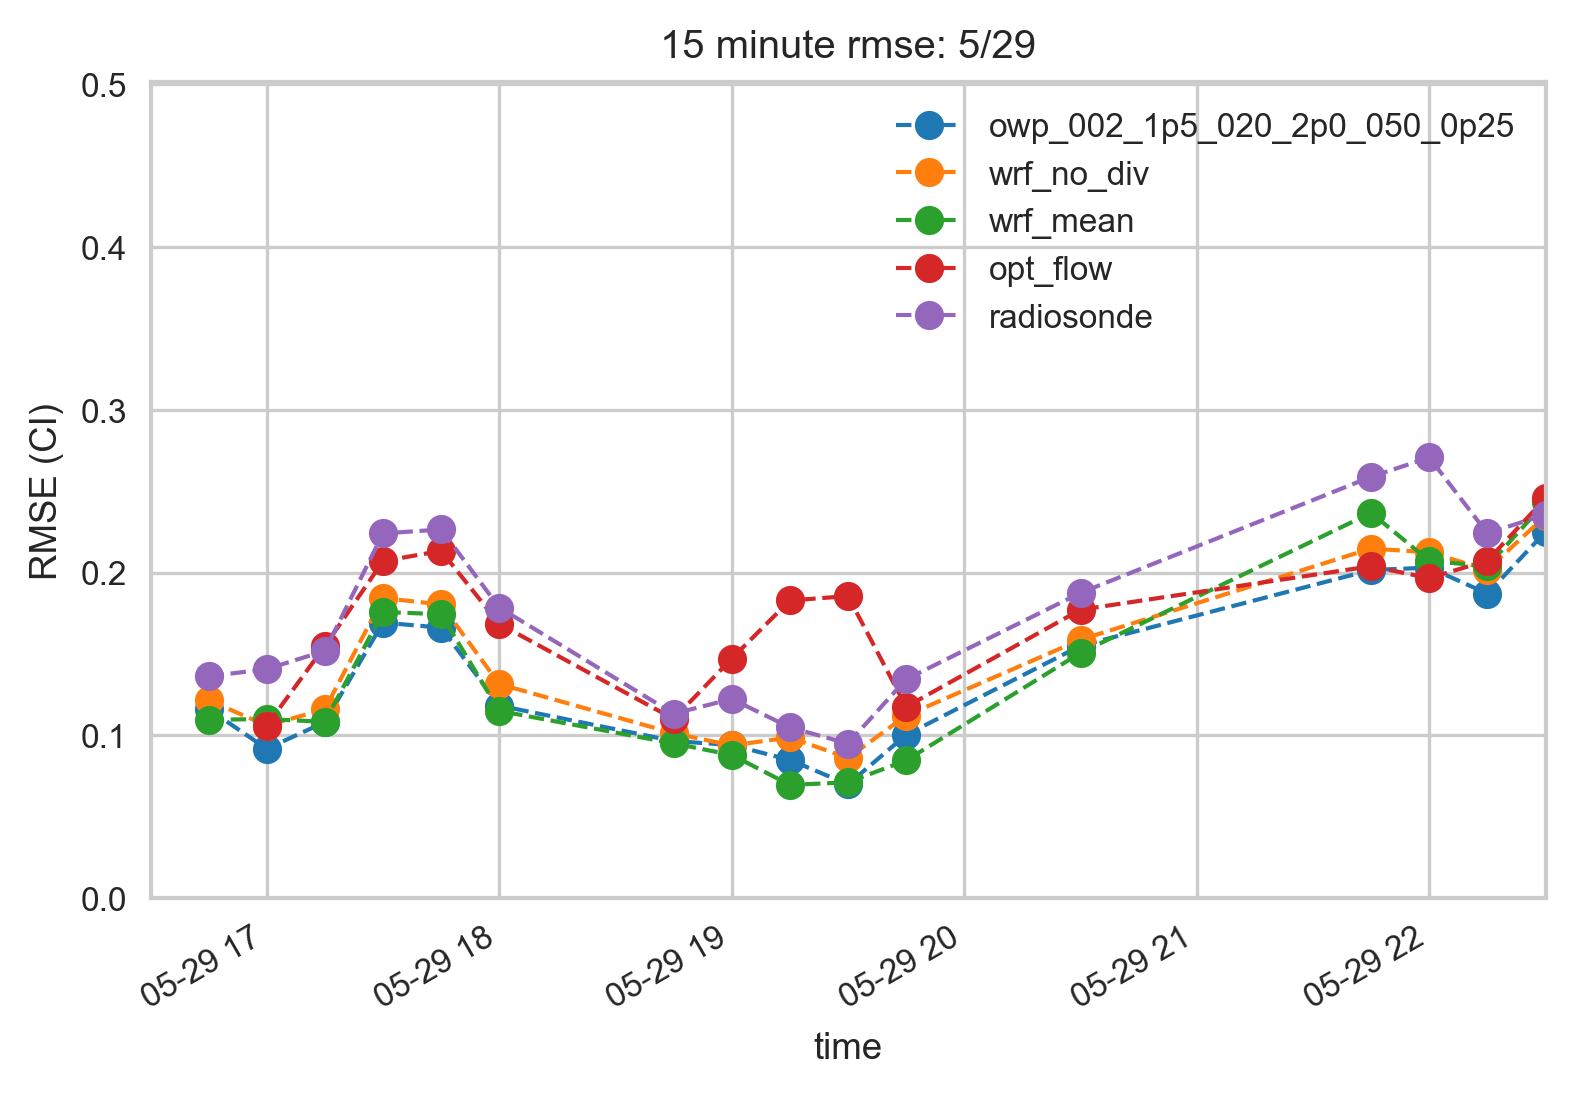

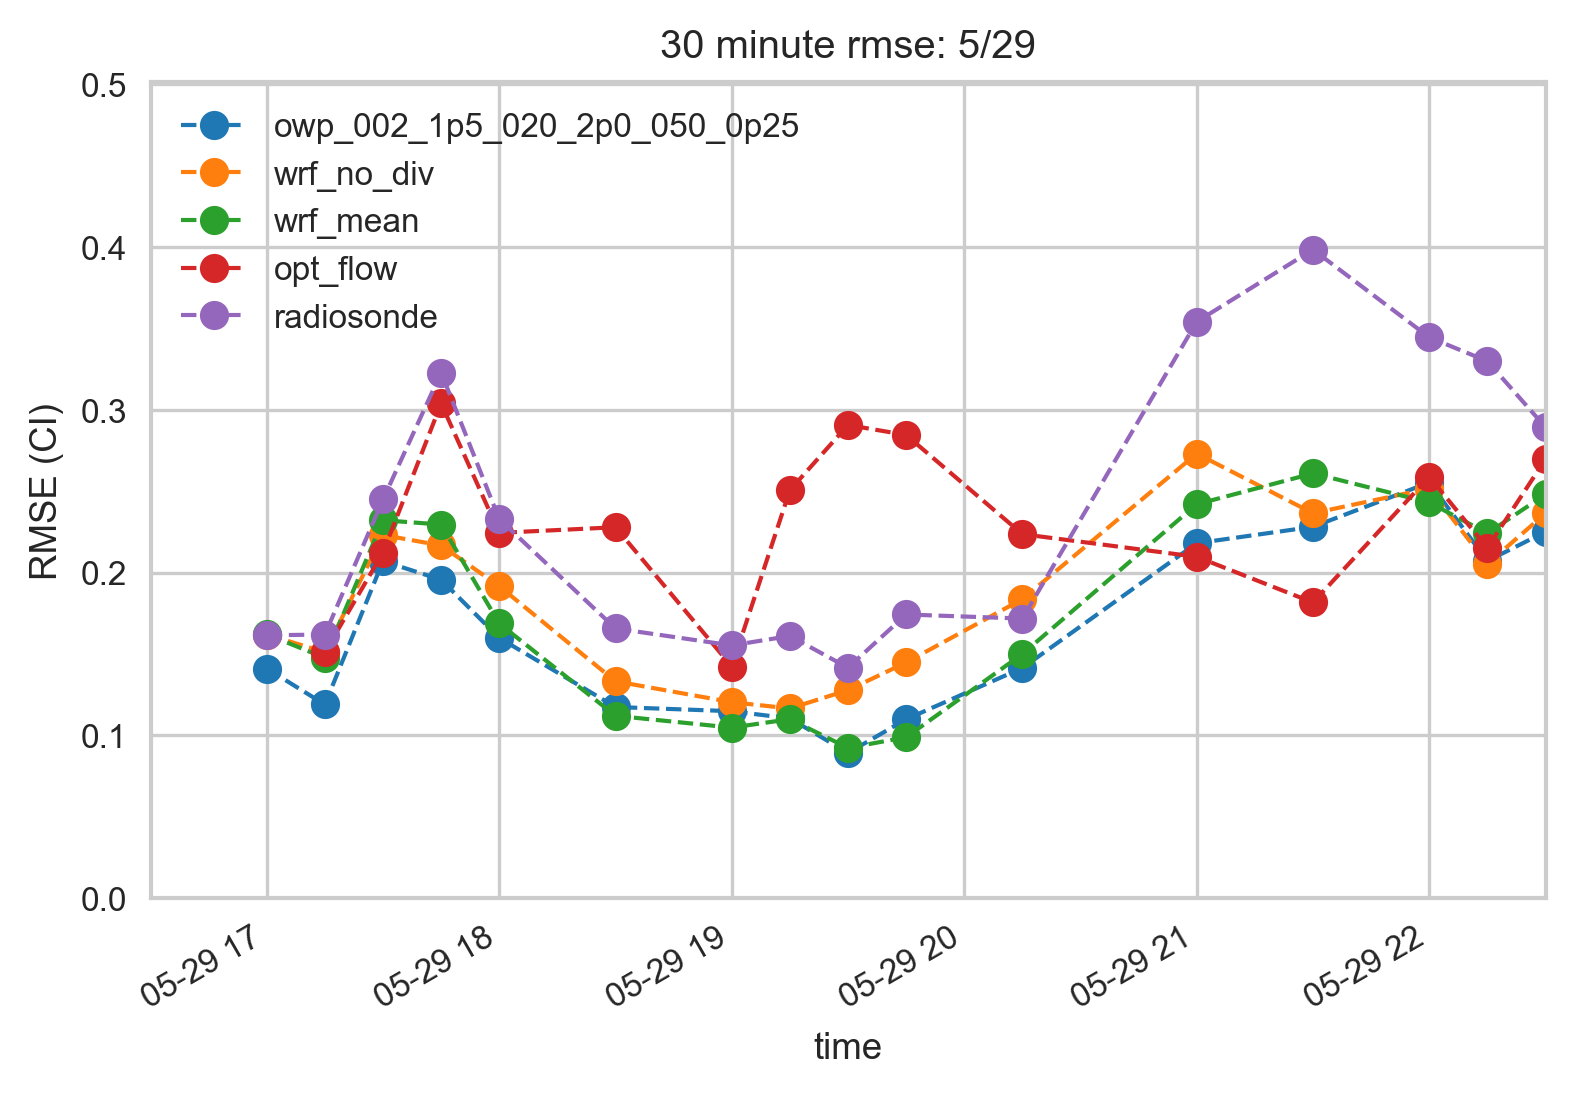

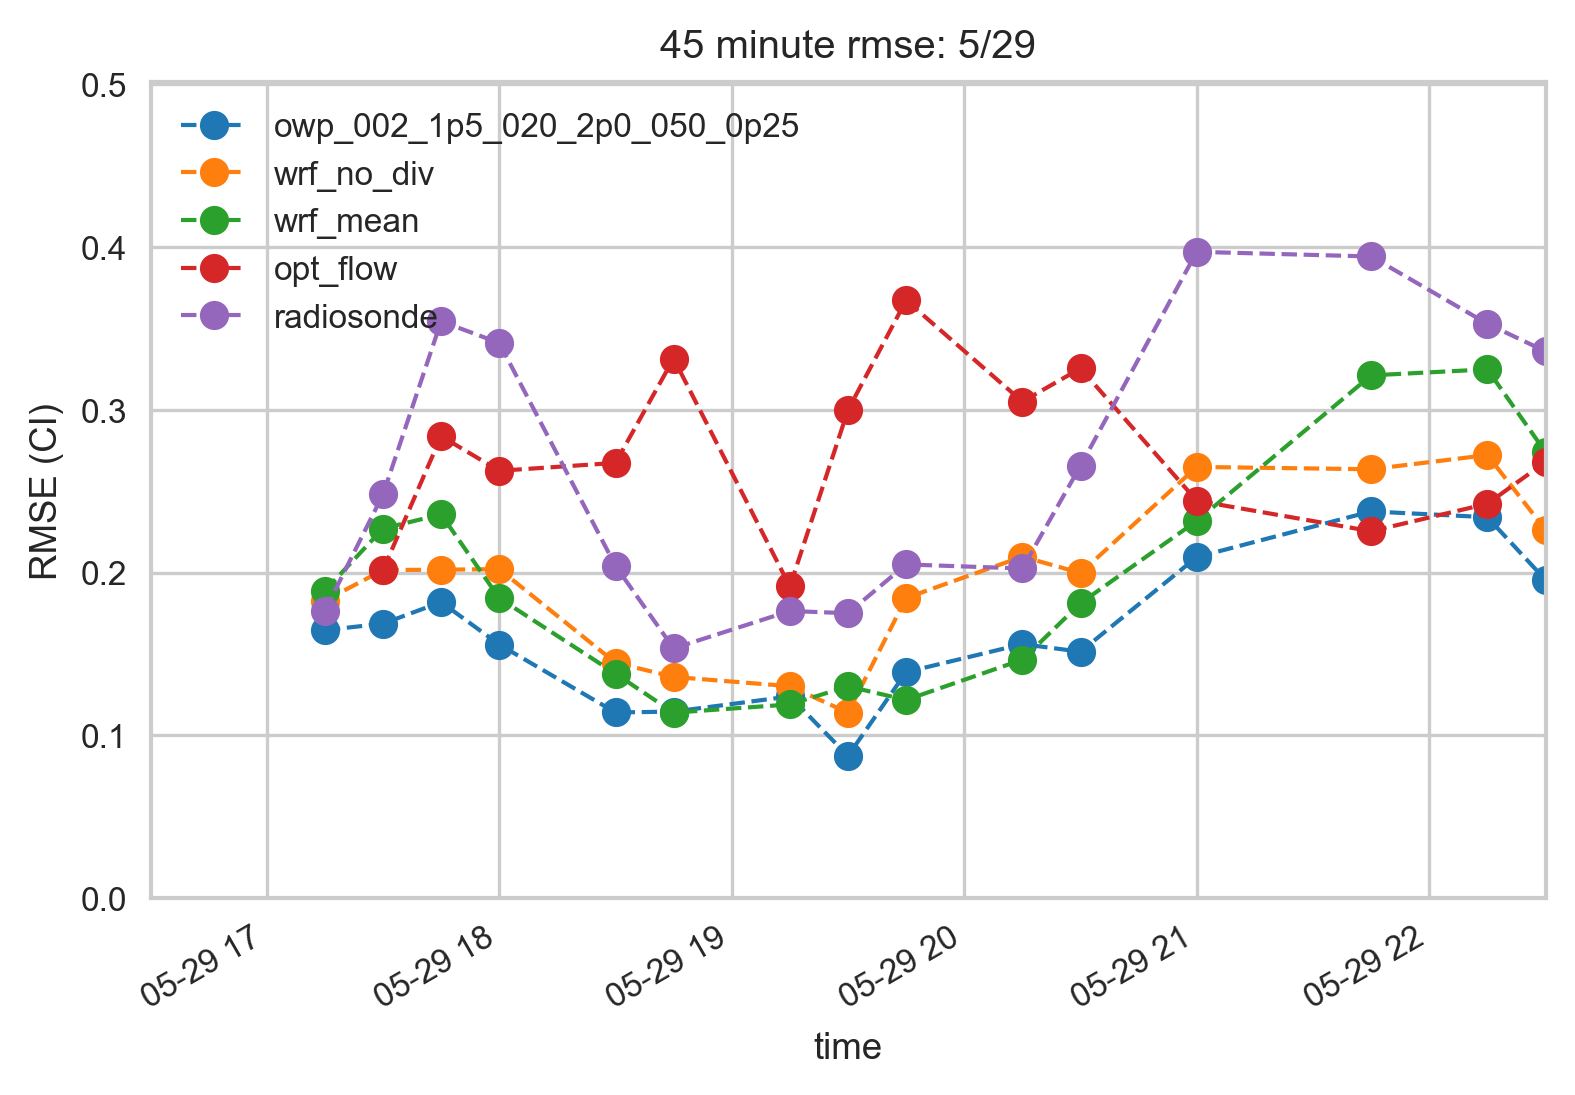

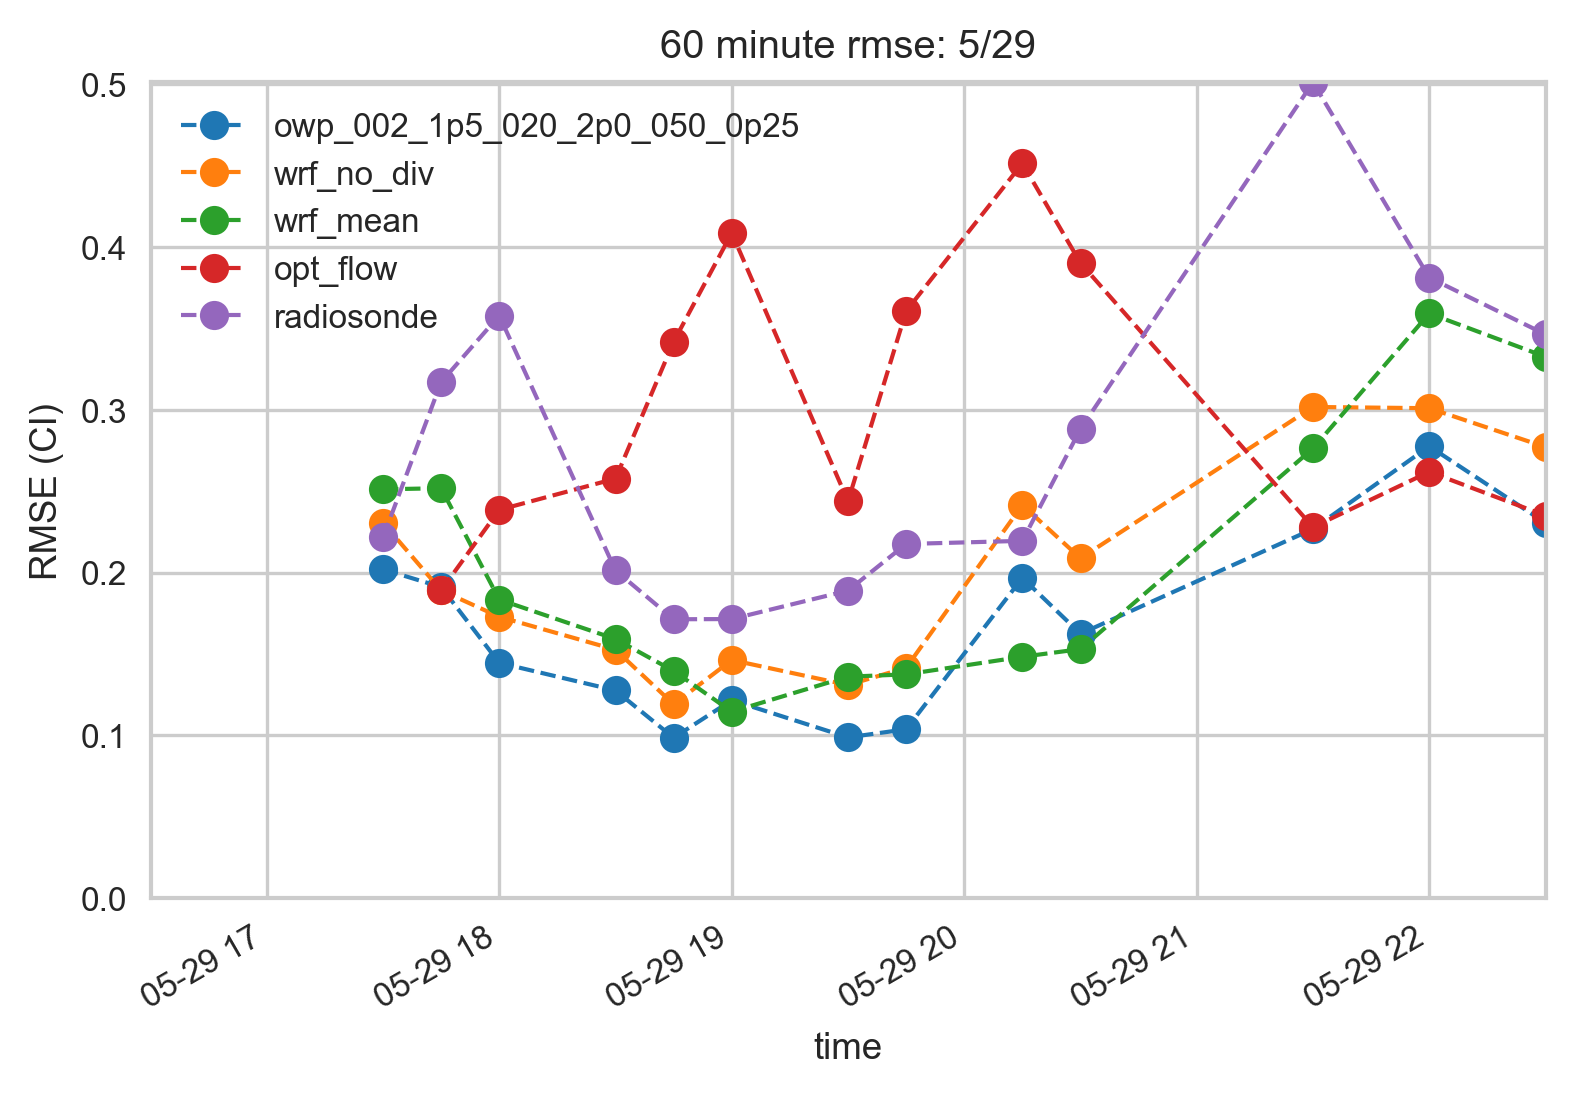

In [115]:
plot_stat(year, month, day, runs, search_paths, 'rmse')

/a2/uaren/travis/results_opt/2014/05/29/owp_002_1p5_020_2p0_050_0p25/correlation.h5
/a2/uaren/travis/results/2014/05/29/wrf_no_div_000/correlation.h5
/a2/uaren/travis/results/2014/05/29/wrf_mean_002/correlation.h5
/a2/uaren/travis/results/2014/05/29/opt_flow_000/correlation.h5
/a2/uaren/travis/results/2014/05/29/radiosonde_000/correlation.h5


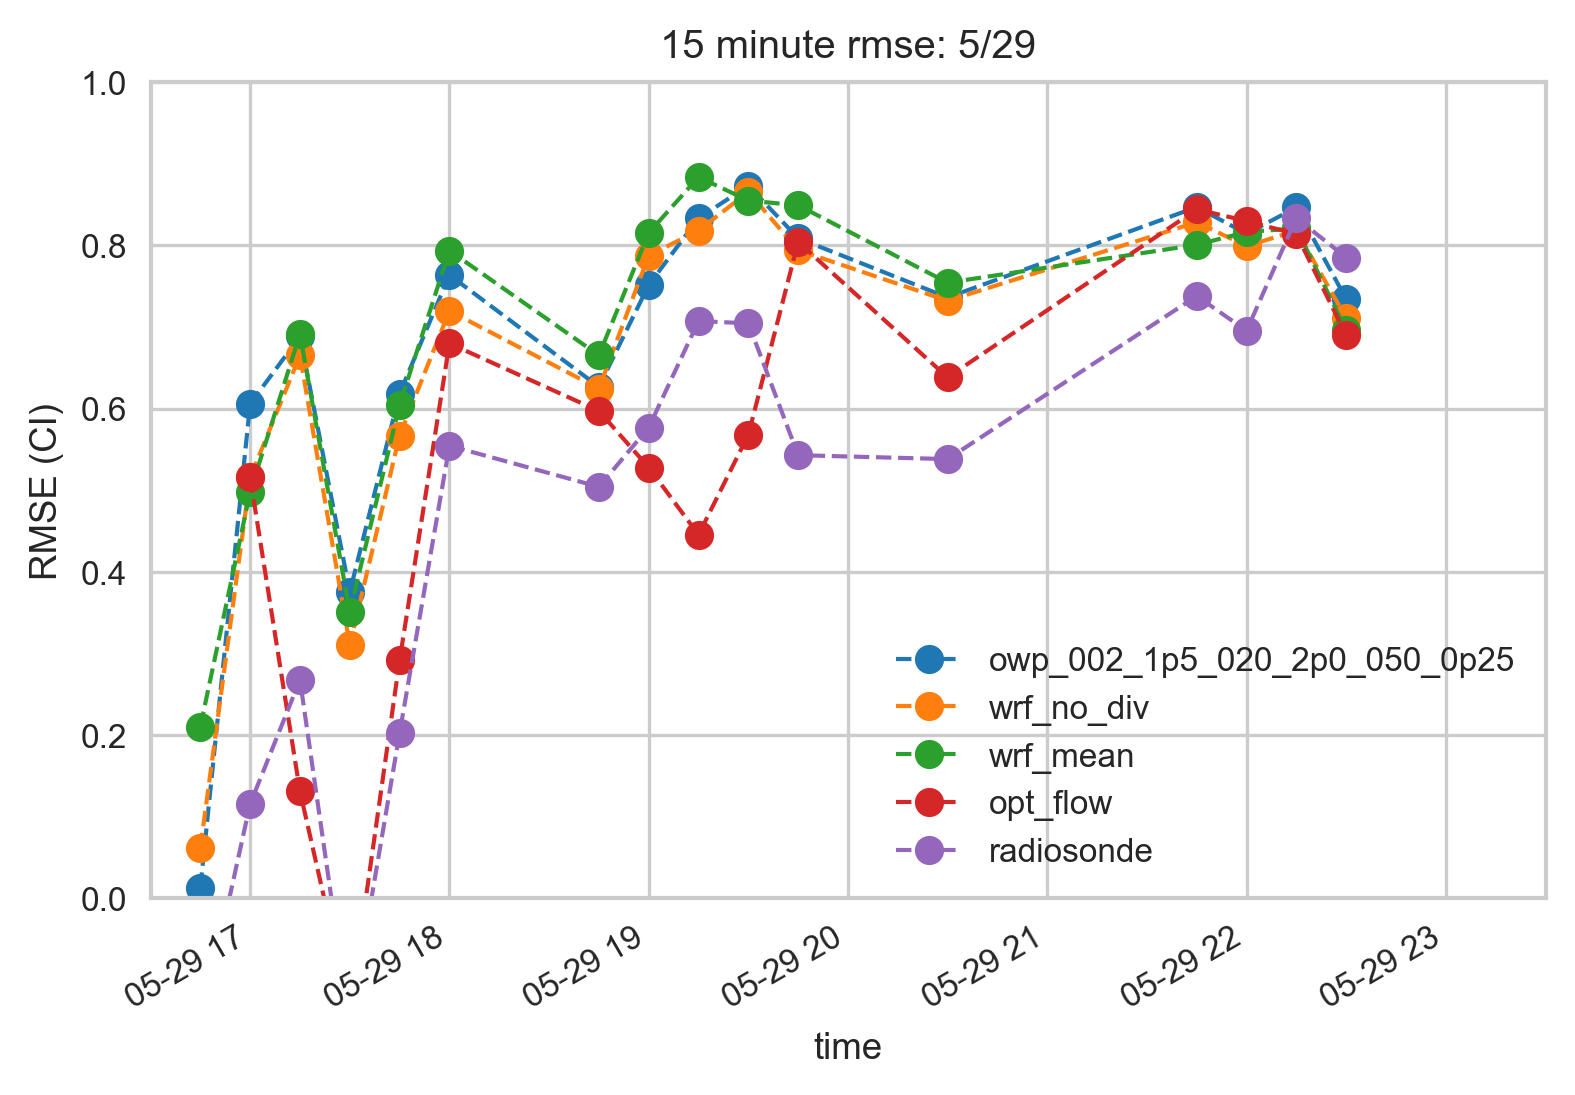

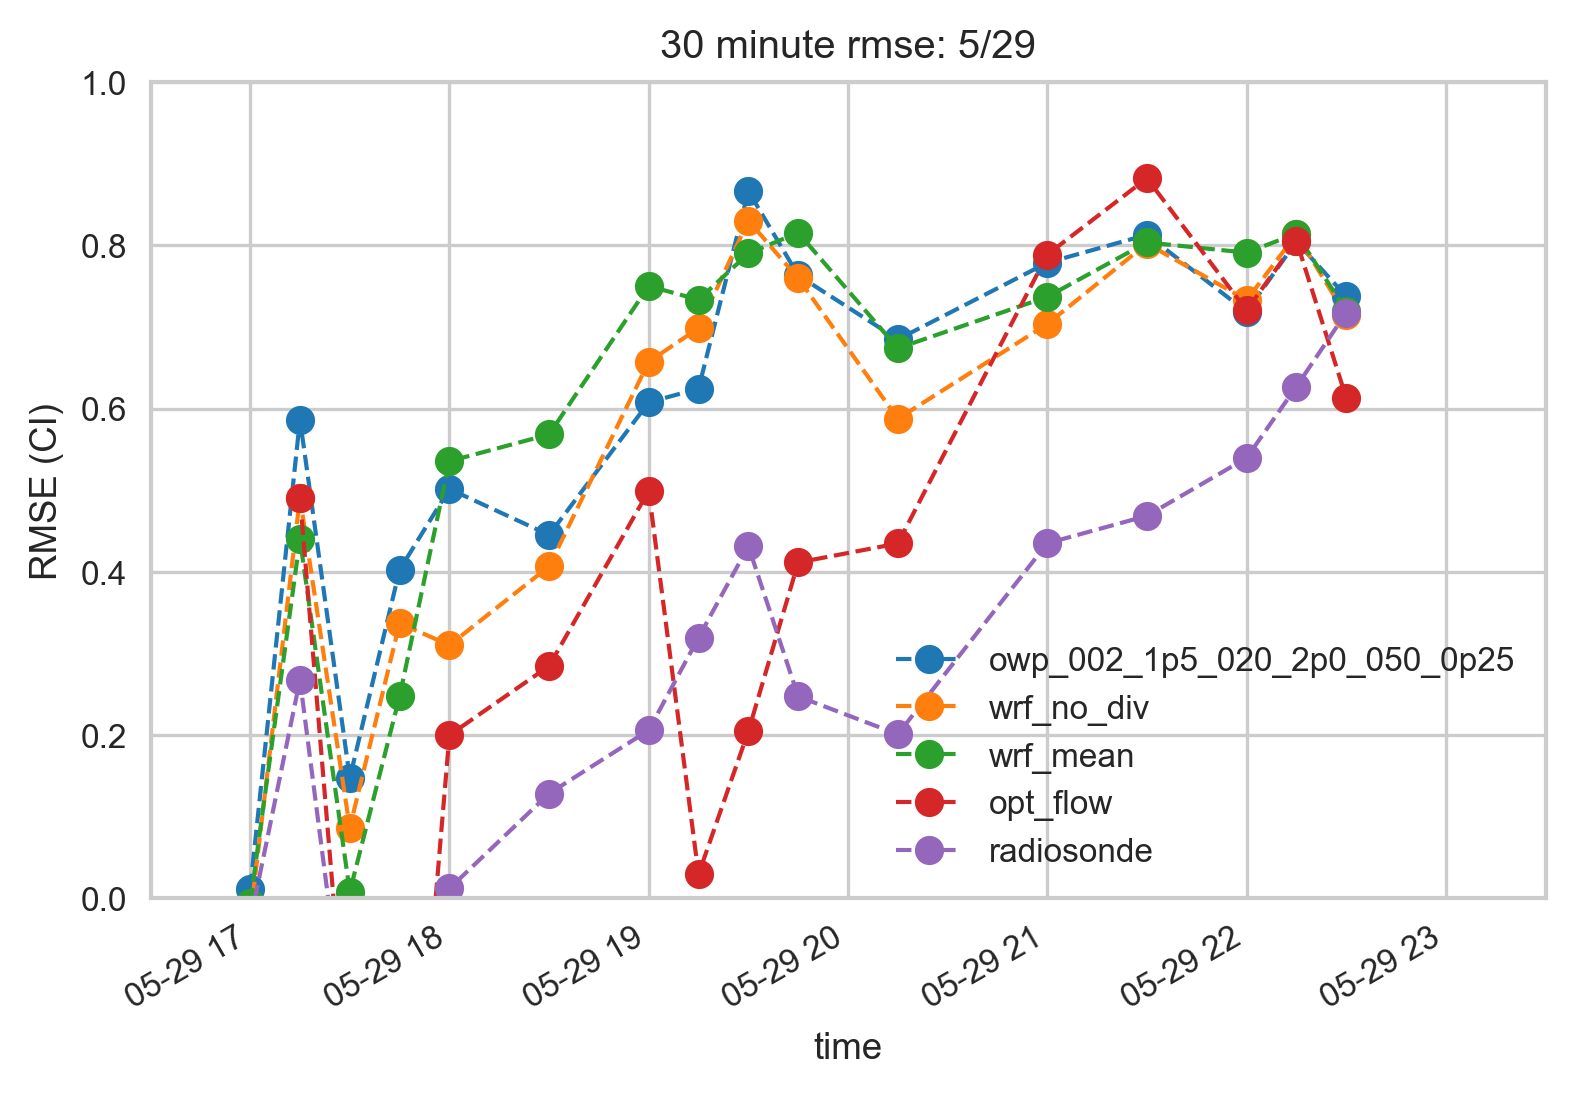

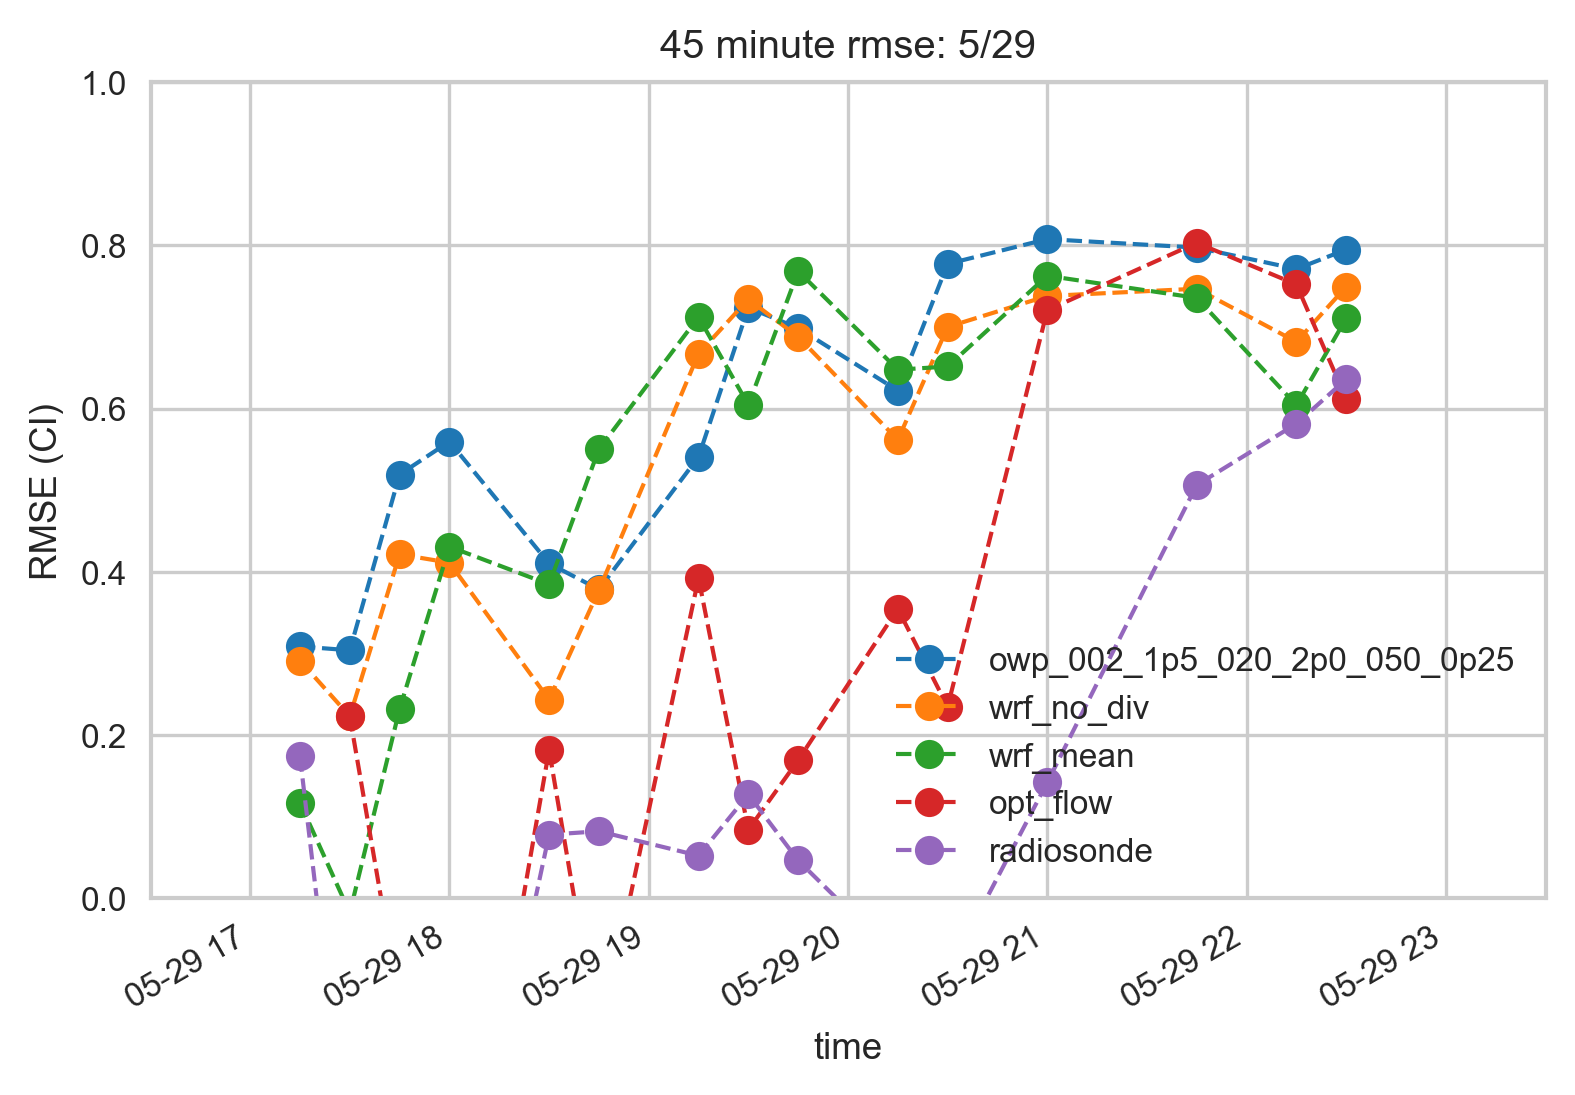

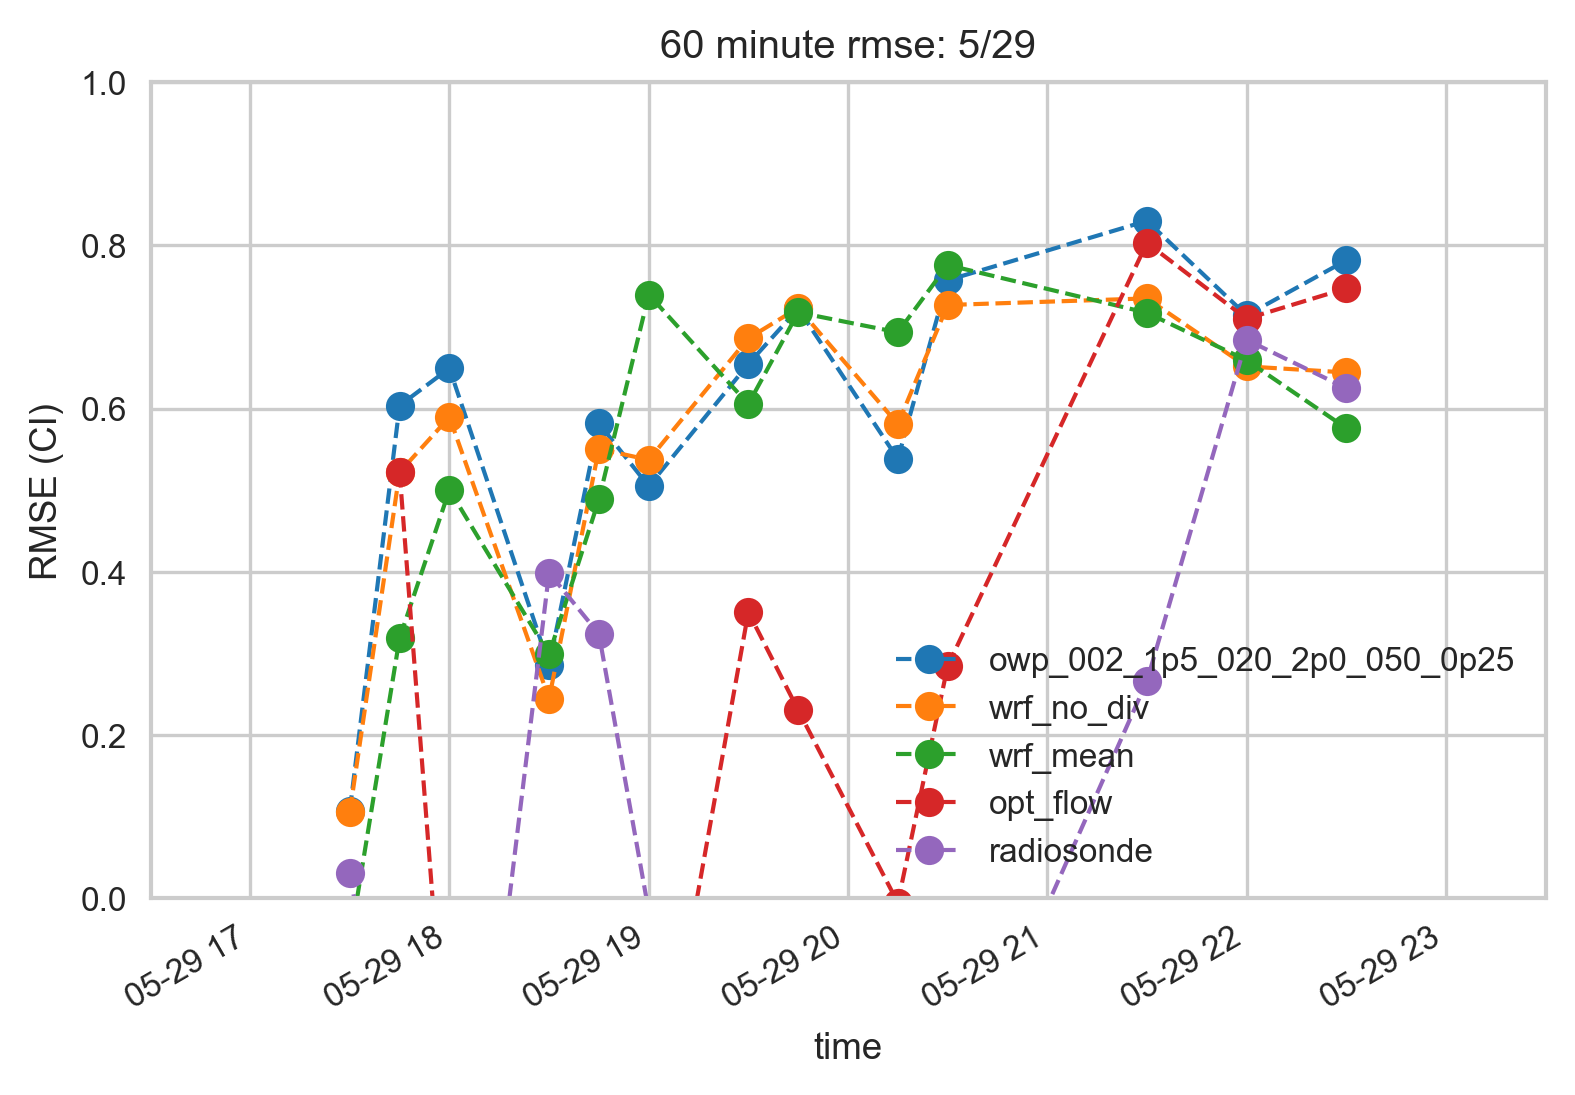

In [116]:
plot_stat(year, month, day, runs, search_paths, 'correlation')

In [ ]:
def generate_plots():
    this_stat = 'rmse'
    y_max = np.max(list(map(lambda x: x[this_stat].max().max(), returned)))
    # y_max = None
    for hor in [15, 30, 45, 60]:
        plt.figure()
        for aresult in returned:
            aresult[this_stat][hor].dropna().plot(linestyle='--', marker='o')
        (aresult[this_stat][hor]*np.nan).plot(color='b')
        
        plt.legend(runs)
        plt.ylim([0, y_max])
        plt.ylabel('RMSE (CI)')
        plt.title(f'{hor} minute rmse: {month}/{day}')

    # y_max = np.max(list(map(lambda x: x[this_stat].max().max(), returned)))
    y_max = None
    for hor in [15, 30, 45, 60]:
        plt.figure()
        for aresult in returned:
            crmse = np.sqrt(
                aresult['rmse'][hor]**2 
                - aresult['bias'][hor]**2)
            crmse.dropna().plot(linestyle='--', marker='o')
        (aresult['rmse'][hor]*np.nan).plot(color='b')

    #     bare[hor].dropna().plot(linestyle='--')
    #     wrf[hor].dropna().plot()
    #     ow_4[hor].dropna().plot()
    #     ow_8[hor].dropna().plot()
    # #     opt_wrf[hor].dropna().plot()
    #     #wrf_no_div[60].dropna().plot()
        plt.legend(runs)
        plt.ylim([0, y_max])
        plt.ylabel('Centered RMSE (CI)')
        plt.title(f'{hor} minute centered rmse: {month}/{day}')

    this_stat = 'bias'
    y_max = np.max(list(map(
        lambda x: x[this_stat].abs().max().max(), returned)))
    # y_max = None
    y_min = -y_max
    # y_min = 0
    for hor in [15, 30, 45, 60]:
        plt.figure()
        for aresult in returned:
            aresult[this_stat][hor].dropna().plot(linestyle='--', marker='o')
        (aresult[this_stat][hor]*np.nan).plot(color='b')

    #     bare[hor].dropna().plot(linestyle='--')
    #     wrf[hor].dropna().plot()
    #     ow_4[hor].dropna().plot()
    #     ow_8[hor].dropna().plot()
    # #     opt_wrf[hor].dropna().plot()
    #     #wrf_no_div[60].dropna().plot()
        plt.legend(runs)
        plt.ylim([y_min, y_max])
        plt.ylabel('Bias (CI)')
        plt.title(f'{hor} minute bias: {month}/{day}')

    this_stat = 'correlation'
    y_max = np.max(list(map(lambda x: x[this_stat].max().max(), returned)))
    y_min = np.min(list(map(lambda x: x[this_stat].min().min(), returned)))
    # y_max = None
    for hor in [15, 30, 45, 60]:
        plt.figure()
        for aresult in returned:
            aresult[this_stat][hor].dropna().plot(linestyle='--', marker='o')
        (aresult[this_stat][hor]*np.nan).plot(color='b')

    #     bare[hor].dropna().plot(linestyle='--')
    #     wrf[hor].dropna().plot()
    #     ow_4[hor].dropna().plot()
    #     ow_8[hor].dropna().plot()
    # #     opt_wrf[hor].dropna().plot()
    #     #wrf_no_div[60].dropna().plot()
        plt.legend(runs)
        plt.ylim([y_min, y_max])
        plt.ylabel('Correlation (unitless)')
        plt.title(f'{hor} minute correlation: {month}/{day}')

    this_stat = 'forecast_sd'
    y_max = np.max(list(map(lambda x: x[this_stat].max().max(), returned)))
    y_max = np.max([returned[0]['truth_sd'].max().max(), y_max])
    y_min = 0
    # y_max = None
    for hor in [15, 30, 45, 60]:
        plt.figure()
        for aresult in returned:
            aresult[this_stat][hor].dropna().plot(linestyle='--', marker='o')
        returned[0]['truth_sd'].dropna().plot(linestyle='--', marker='o')
        (aresult[this_stat][hor]*np.nan).plot(color='b')

        plt.legend(runs + ['truth'])
        plt.ylim([y_min, y_max])
        plt.ylabel('SD (CI)')
        plt.title(f'{hor} minute standard deviation: {month}/{day}')
    
    this_stat = 'spread_ci'
    y_max = np.max(list(map(lambda x: x[this_stat].max().max(), returned)))
    y_min = 0
    for hor in [15, 30, 45, 60]:
        plt.figure()
        for aresult in returned:
            aresult[this_stat][hor].dropna().plot(linestyle='--', marker='o')
        (aresult[this_stat][hor]*np.nan).plot(color='b')

        plt.legend(runs + ['truth'])
        plt.ylim([y_min, y_max])
        plt.ylabel('Spread (CI)')
        plt.title(f'{hor} minute CI spread: {month}/{day}')
        
    this_stat = 'u_spread'
    y_max = np.max(list(map(lambda x: x[this_stat].max().max(), returned)))
    y_min = 0
    for hor in [15, 30, 45, 60]:
        plt.figure()
        for aresult in returned:
            aresult[this_stat][hor].dropna().plot(linestyle='--', marker='o')
        (aresult[this_stat][hor]*np.nan).plot(color='b')

        plt.legend(runs + ['truth'])
        plt.ylim([y_min, y_max])
        plt.ylabel('spread (m/s)')
        plt.title(f'{hor} minute U spread: {month}/{day}')
    
    this_stat = 'u_spread'
    y_max = np.max(list(map(lambda x: x[this_stat].max().max(), returned)))
    y_min = 0
    for hor in [15, 30, 45, 60]:
        plt.figure()
        for aresult in returned:
            aresult[this_stat][hor].dropna().plot(linestyle='--', marker='o')
        (aresult[this_stat][hor]*np.nan).plot(color='b')

        plt.legend(runs + ['truth'])
        plt.ylim([y_min, y_max])
        plt.ylabel('spread (m/s)')
        plt.title(f'{hor} minute U spread: {month}/{day}')
        
    this_stat = 'rmse'
    y_max = np.max(list(map(lambda x: x['rmse'].max().max(), returned)))
    y_max_1 = np.max(list(map(lambda x: x['spread_ci'].max().max(), returned)))
    y_max = np.max([y_max, y_max_1])
    # y_max = None
    for hor in [15, 30, 45, 60]:
        plt.figure()
        colors = ['b', 'orange', 'r', 'k', 'g', 'y']
        color_count = 0
        for aresult in returned:
            c = colors[color_count]
            color_count += 1
            aresult['rmse'][hor].dropna().plot(marker='o', color = c)
        
        color_count = 0
        for aresult in returned:
            c = colors[color_count]
            color_count += 1
            aresult['spread_ci'][hor].dropna().plot(linestyle='--', marker='*', color = c)
        (aresult[this_stat][hor]*np.nan).plot(color='b')

    #     bare[hor].dropna().plot(linestyle='--')
    #     wrf[hor].dropna().plot()
    #     ow_4[hor].dropna().plot()
    #     ow_8[hor].dropna().plot()
    # #     opt_wrf[hor].dropna().plot()
    #     #wrf_no_div[60].dropna().plot()
        plt.legend(runs)
        plt.ylim([0, y_max])
        plt.ylabel('RMSE (CI)')
        plt.title(f'{hor} minute rmse: {month}/{day}')